<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Format" data-toc-modified-id="Format-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Format</a></span></li></ul></li><li><span><a href="#Host-tree-subsample" data-toc-modified-id="Host-tree-subsample-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Host tree subsample</a></span></li><li><span><a href="#PGLS" data-toc-modified-id="PGLS-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>PGLS</a></span><ul class="toc-item"><li><span><a href="#Digestive-system" data-toc-modified-id="Digestive-system-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Digestive system</a></span><ul class="toc-item"><li><span><a href="#Saving-output" data-toc-modified-id="Saving-output-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Saving output</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Diet" data-toc-modified-id="Diet-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Diet</a></span><ul class="toc-item"><li><span><a href="#Saving-output" data-toc-modified-id="Saving-output-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Saving output</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Significant-OTUs" data-toc-modified-id="Significant-OTUs-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Significant OTUs</a></span><ul class="toc-item"><li><span><a href="#Saving-results" data-toc-modified-id="Saving-results-6.2.3.1"><span class="toc-item-num">6.2.3.1&nbsp;&nbsp;</span>Saving results</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-6.2.3.2"><span class="toc-item-num">6.2.3.2&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li><li><span><a href="#Sig.-OTU-dist.-across-diets" data-toc-modified-id="Sig.-OTU-dist.-across-diets-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Sig. OTU dist. across diets</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* PGLS to assess OTU associations with diet or digestive systems

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS/'

# microbiome
## 16S-arch phyloseq object (one sample per individual)
## looking at OTU pres/abs (post-rarefy) with binomial regression to account for digestive system
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD_rare250.RDS'

# host tree
host_tree_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_200429_16S-arch_IndD.nwk'

# misc params
threads = 8
my_seed = 8394

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

library(ape)
library(ade4)
library(caper)
library(phyloseq)

library(doParallel)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘caper’ was built under R version 3.6.3”
Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: mvtnorm

Warning message:
“package ‘mvtnorm’ was built under R version 3.6.3”
Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [3]:
df.dims()
set.seed(my_seed)
make_dir(work_dir)
RhpcBLASctl::blas_set_num_threads(1)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS/ 


# Load

In [4]:
# phyloseq obj.
physeq = readRDS(physeq_arch_IndD_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1345 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1345 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1345 tips and 1342 internal nodes ]

In [5]:
# filtering by sparsity
physeq = physeq %>%
    filter_taxa(function(x) sum(x > 0) >= 2, TRUE) %>%
    prune_samples(sample_sums(.) > 0, .)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 355 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 355 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 355 tips and 354 internal nodes ]

In [6]:
# otu table
otu = physeq %>%
    phyloseq2df(otu_table) %>%
    as.data.frame
rownames(otu) = otu$OTU
otu$OTU = NULL
otu = otu %>% t %>% as.data.frame
otu

,c5fbed2bb10ab3a08275a92e9caea3c1,1936b1a270b058c5754be0addc7c7c31,6668cc03267d4f04b5a34d676c1db57a,6e9321684640a05dd16b7bc01b98c14a,0c59c44aeb355d3aa4dfa33ac4e77cde,2a64fe6cea748d320b2f99fe83449e46,458f7b9ac8ea99af3b251a761c878332,7950a70a07006f7c7b0c6f02c46a93af,9dd5def1c71e9aa144221be97b12d2e6,7efd5f90bad3210ac9182784e5882716,⋯,95cfc3c342d1f3a2af58c49f6065b08a,f40a4552f05b5c3ca111c9886b7360a0,e50dfa4783c02bc4cbff9d9297e8d844,056a6332380b1f40d814d70adc074217,de8bd36d71e9372a6b9e16b54cefa562,569a2abee10cb7fdef315334d856b92b,890c6bb9fc8dea9dc4b756a645f4f472,b171d5cdecd235e7199d44ce8991794d,36fd5c55ad082f4d05194157da9d13da,d7dd0bdd8184f8cb7189e1e09afa97d0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0.0
F35_Red_Deer,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3.6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
X67_European_Roe,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
# metadata
metadata = physeq %>% 
    phyloseq2df(sample_data) %>%
    mutate(scientific_name = gsub(' ', '_', scientific_name),
           digestive_system = gsub('fermentation activity ', '', digestive_system)) %>%
    as.data.frame
rownames(metadata) = metadata$SampleID
metadata 

,SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,CH4_kJ.d_sd,i.CH4_L.d_mean,i.CH4_L.d_sd,i.CH4_L.kgBM_mean,i.CH4_L.kgBM_sd,i.CH4_g.d_mean,i.CH4_g.d_sd,i.CH4_kJ.d_mean,i.CH4_kJ.d_sd,Sample
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F14_Common_Bream,F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,F14_Common_Bream
F35_Red_Deer,F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,1075.505,52.24132,27.18306,0.4858472,0.1686955,38.67117,21.30162,2066.942,1075.505,F35_Red_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,X431_Quagga,431,Steppenzebra,Quagga,Equus_quagga,NA,89252,Mammalia,Perissodactyla,Equidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X431_Quagga
X67_European_Roe,X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,X67_European_Roe


In [8]:
# host phylogeny
host_tree = read.tree(host_tree_IndD_file)
host_tree


Phylogenetic tree with 185 tips and 184 internal nodes.

Tip labels:
	X60_European_Chub, X179_Roach, X330_Ide, X327_Silver_Bream, X326_Silver_Bream, F14_Common_Bream, ...
Node labels:
	, @_20_@, @_17_@, @_14_@, @_9_@, @_15_@, ...

Rooted; includes branch lengths.

## Format

In [9]:
diet_vars = c(
'diet',
'diet_vertebrate',
'diet_invertebrate',
'diet_fruit',
'diet_flowers_nectar_pollen',
'diet_leaves_branches_bark_buds',
'diet_seeds',
'diet_grass_waterplants',
'diet_roots_tubers',
'digestive_system'
)
otu = cbind(metadata[,diet_vars], otu)
colnames(otu) = gsub('^([0-9])', 'X\\1', colnames(otu))
otu

,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,digestive_system,⋯,X95cfc3c342d1f3a2af58c49f6065b08a,f40a4552f05b5c3ca111c9886b7360a0,e50dfa4783c02bc4cbff9d9297e8d844,X056a6332380b1f40d814d70adc074217,de8bd36d71e9372a6b9e16b54cefa562,X569a2abee10cb7fdef315334d856b92b,X890c6bb9fc8dea9dc4b756a645f4f472,b171d5cdecd235e7199d44ce8991794d,X36fd5c55ad082f4d05194157da9d13da,d7dd0bdd8184f8cb7189e1e09afa97d0
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F14_Common_Bream,omnivore,no,yes,no,no,no,no,yes,no,simple,⋯,0,0,0,0,0,0,0,0,0,0.0
F35_Red_Deer,herbivore,no,no,yes,no,yes,yes,yes,yes,foregut,⋯,0,0,0,0,0,0,0,0,0,3.6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,herbivore,no,no,no,no,no,yes,yes,no,hindgut,⋯,0,0,0,0,0,0,0,0,0,0
X67_European_Roe,herbivore,no,no,yes,no,yes,yes,yes,no,foregut,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
# encoding diet vars as numeric
otu$diet = case_when(otu$diet == 'herbivore' ~ 1,
                     otu$diet == 'omnivore' ~ 0.5,
                     otu$diet == 'carnivore' ~ 0)

otu$digestive_system = case_when(otu$digestive_system == 'hindgut' ~ 0,
                                 otu$digestive_system == 'simple hindgut' ~ 0.25,
                                 otu$digestive_system == 'simple' ~ 0.5,
                                 otu$digestive_system == 'simple foregut' ~ 0.75,
                                 otu$digestive_system == 'foregut' ~1)

for(x in diet_vars[2:(length(diet_vars)-1)]){
    otu[,x] = gsub(' .+', '', otu[,x])
    otu[,x] = ifelse(otu[,x] == 'yes', 1, 0) %>% as.numeric
}

otu$taxa = rownames(otu)
otu 

,diet,diet_vertebrate,diet_invertebrate,diet_fruit,diet_flowers_nectar_pollen,diet_leaves_branches_bark_buds,diet_seeds,diet_grass_waterplants,diet_roots_tubers,digestive_system,⋯,f40a4552f05b5c3ca111c9886b7360a0,e50dfa4783c02bc4cbff9d9297e8d844,X056a6332380b1f40d814d70adc074217,de8bd36d71e9372a6b9e16b54cefa562,X569a2abee10cb7fdef315334d856b92b,X890c6bb9fc8dea9dc4b756a645f4f472,b171d5cdecd235e7199d44ce8991794d,X36fd5c55ad082f4d05194157da9d13da,d7dd0bdd8184f8cb7189e1e09afa97d0,taxa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F14_Common_Bream,0.5,0,1,0,0,0,0,1,0,0.5,⋯,0,0,0,0,0,0,0,0,0.0,F14_Common_Bream
F35_Red_Deer,1.0,0,0,1,0,1,1,1,1,1.0,⋯,0,0,0,0,0,0,0,0,3.6,F35_Red_Deer
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,1,0,0,0,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,X431_Quagga
X67_European_Roe,1,0,0,1,0,1,1,1,0,1,⋯,0,0,0,0,0,0,0,0,0,X67_European_Roe


In [11]:
# checking values
colSums(otu[,1:10])

diet                diet_vertebrate 
                         120.5                           52.0 
             diet_invertebrate                     diet_fruit 
                          82.0                           74.0 
    diet_flowers_nectar_pollen diet_leaves_branches_bark_buds 
                          16.0                           93.0 
                    diet_seeds         diet_grass_waterplants 
                          79.0                          104.0 
             diet_roots_tubers               digestive_system 
                          66.0                          100.0

# Host tree subsample

In [12]:
# replicate analyses with different subsets of the host phylogeny
n_reps = 100

In [13]:
# checking overlap
overlap(host_tree$tip.label, rownames(otu)) 

intersect(x,y): 185 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 185 


In [14]:
#' randomly selecting one per group
tree_subsample = function(L, df, tree){
    # get subsample (note: subsampling within each species)
    to_keep = df %>% 
        group_by(scientific_name) %>% 
        sample_n(1) %>%
        .$sample
    # subsampling tree
    to_rm = setdiff(tree$tip.label, to_keep)
    tree = drop.tip(tree, to_rm)
    return(tree)
}

In [15]:
# permuted trees
df = metadata %>%
    mutate(sample = SampleID) %>%
    dplyr::select(sample, scientific_name) 

doParallel::registerDoParallel(threads)
host_tree_l = plyr::llply(as.list(1:n_reps), 
                          function(x) tree_subsample(x, df, host_tree),
                          .parallel=TRUE)
host_tree_l %>% length

[1] 100

In [16]:
# check tips per tree
lapply(host_tree_l, function(x) x$tip.label %>% length) %>% unlist %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    110     110     110     110     110     110 

# PGLS

In [17]:
pgls_each_var = function(y, x, tree, data){
    cdat = comparative.data(data=data, phy=tree, names.col="taxa")
    
    f = as.formula(paste(c(y, x), collapse=' ~ '))
    mod = pgls(f, cdat) %>% summary
    
    df = mod$coefficients %>% as.data.frame
    colnames(df) = c('Estimate', 'std_err', 't_value', 'p_value')
    df$R2 = mod$adj.r.squared %>% as.vector %>% .[1]
    df$x = x
    df$y = y
    df = df[2,] %>% as.data.frame
    return(df)
}

In [18]:
#' PGLS on each tree
pgls_each_tree = function(rep, y, x, tree_list, data, threads=1){
    tree = tree_list[[rep]]
    data = data[tree$tip.label,] 
    
    doParallel::registerDoParallel(threads)
    ret = plyr::llply(as.list(y),
                      pgls_each_var,
                      x = x,
                      tree = tree,
                      data = data,
                      .parallel = TRUE)
    ret = do.call(rbind, ret)
    ret$rep = rep
    return(ret)
}

In [122]:
#-- debug --#
y = colnames(otu)[10:13]
ret = pgls_each_tree(1,
                     y = y,
                     x = 'digestive_system',
                     tree_list = host_tree_l,
                     data = otu,
                     threads = threads)

ret = do.call(rbind, ret) %>%
    as.data.frame
colnames(ret) = y

ret 

,digestive_system,c5fbed2bb10ab3a08275a92e9caea3c1,X1936b1a270b058c5754be0addc7c7c31,X6668cc03267d4f04b5a34d676c1db57a
,<fct>,<fct>,<fct>,<fct>
Estimate,NA,0,0,1.28252349218929e-05
std_err,NA,0,0,0.0628681049032814
⋮,⋮,⋮,⋮,⋮
y,NA,c5fbed2bb10ab3a08275a92e9caea3c1,X1936b1a270b058c5754be0addc7c7c31,X6668cc03267d4f04b5a34d676c1db57a
rep,1,1,1,1


## Digestive system

In [123]:
y = colnames(otu)[(length(diet_vars)+1):(ncol(otu)-1)]     # all OTUs
ret = plyr::llply(1:length(host_tree_l),
                  pgls_each_tree,
                  y = y,
                  x = 'digestive_system',
                  tree_list = host_tree_l,
                  data = otu,
                  threads = threads)

ret = do.call(rbind, ret) %>%
    as.data.frame
ret 

,Estimate,std_err,t_value,p_value,R2,x,y,rep
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
digestive_system,0,0,NaN,NaN,NaN,digestive_system,c5fbed2bb10ab3a08275a92e9caea3c1,1
digestive_system1,0,0,NaN,NaN,NaN,digestive_system,X1936b1a270b058c5754be0addc7c7c31,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
digestive_system35399,-0.334187162,0.37644749,-0.88773911,0.3766539,-0.001948001,digestive_system,X36fd5c55ad082f4d05194157da9d13da,100
digestive_system35499,0.002952378,0.08883319,0.03323508,0.9735485,-0.009248937,digestive_system,d7dd0bdd8184f8cb7189e1e09afa97d0,100


In [124]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/03_modulating_factors/04b_PGLS_IndD_rare250.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



In [125]:
# formatting results
pgls_res = ret %>%
    group_by(rep) %>%
    mutate(p_value = p_value %>% as.Num,
           q_value = p.adjust(p_value, method='BH')) %>%
    group_by(y) %>%
    summarize(Estimate = mean(Estimate),
              std_err = mean(std_err),
              t_value = mean(t_value),
              p_value = mean(p_value),
              q_value = (length(q_value) - sum(q_value < 0.05)) / length(q_value),
              R2 = mean(R2),
              x = first(x),
              .groups='drop')

pgls_res$p_value %>% summary
pgls_res$q_value %>% summary
pgls_res

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00969 0.58910 0.87877 0.73399 0.95635 0.99853     106 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     106 

y,Estimate,std_err,t_value,p_value,q_value,R2,x,.groups
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
a037a93b9d93156a9b42c06638063f81,0.02206604,0.4427624,0.05124357,0.9592277,1,-0.009233984,digestive_system,drop
a3687ef99b6390eb2b6317868647a150,0.01590687,0.4758872,0.03343059,0.9733929,1,-0.009248815,digestive_system,drop
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X9ef214cb9244d2751cde5adc3c1e12f7,-0.36865021,0.4152686,-0.8877391,0.3766539,1,-0.001948001,digestive_system,drop
X9f56339e83804b62fd2e269181961eff,0.05999453,0.5068566,0.1229687,0.9023719,1,-0.009115782,digestive_system,drop


### Saving output

In [126]:
# output file name
pgls_res_file = file.path(work_dir, 'pgls_IndD_otu-rare250_digSys.RDS')
pgls_res_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_otu-clr_digSys.RDS"

In [127]:
# saving
saveRDS(pgls_res, file=pgls_res_file)
cat('File written:', pgls_res_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_otu-clr_digSys.RDS 


In [128]:
# re-load 
pgls_res = readRDS(pgls_res_file) 
pgls_res %>% dfhead

[1] 355   9


y,Estimate,std_err,t_value,p_value,q_value,R2,x,.groups
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
a037a93b9d93156a9b42c06638063f81,0.02206604,0.4427624,0.05124357,0.9592277,1,-0.009233984,digestive_system,drop
a3687ef99b6390eb2b6317868647a150,0.01590687,0.4758872,0.03343059,0.9733929,1,-0.009248815,digestive_system,drop
a3acff0b549467fd76310602b972ffad,0.11144931,0.8446076,0.13195395,0.8952662,1,-0.009096572,digestive_system,drop


### Summary

In [131]:
# summary
pgls_res$p_value %>% summary_x('p-value')
pgls_res$q_value %>% summary_x('adj p-value')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
p-value,0.009692298,0.5891035,0.8787748,0.7339902,0.9563505,0.9985256,106,39.803,15.044


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
adj p-value,1,1,1,1,1,1,106,39.686,15


Warning message:
“Removed 106 rows containing missing values (geom_point).”


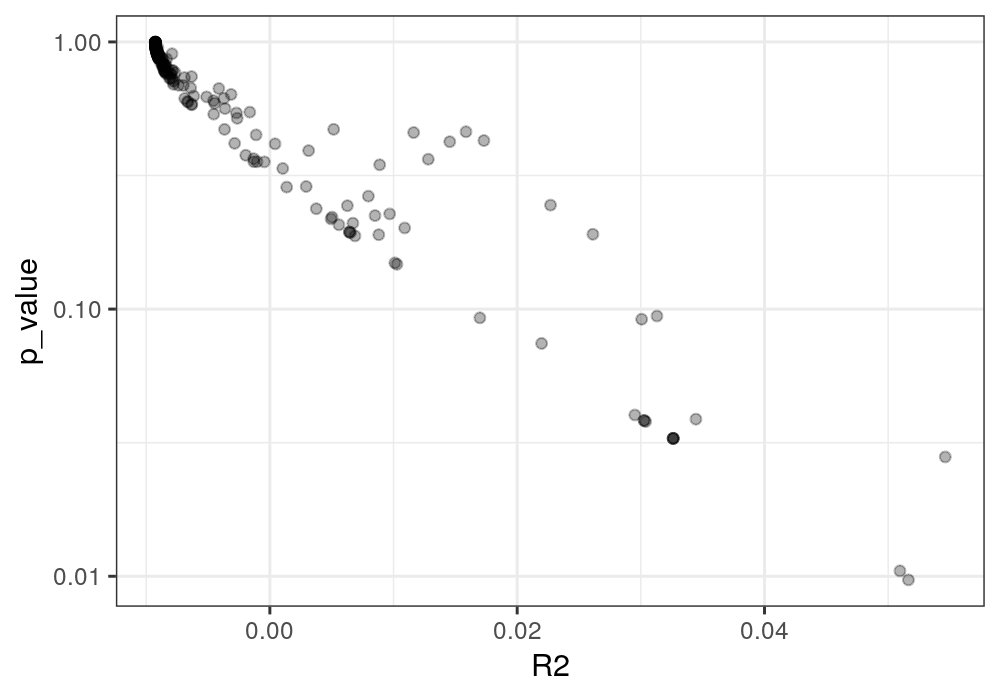

In [132]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

p.dims(5,3.5)
plot(p)

Warning message:
“Removed 106 rows containing missing values (geom_point).”


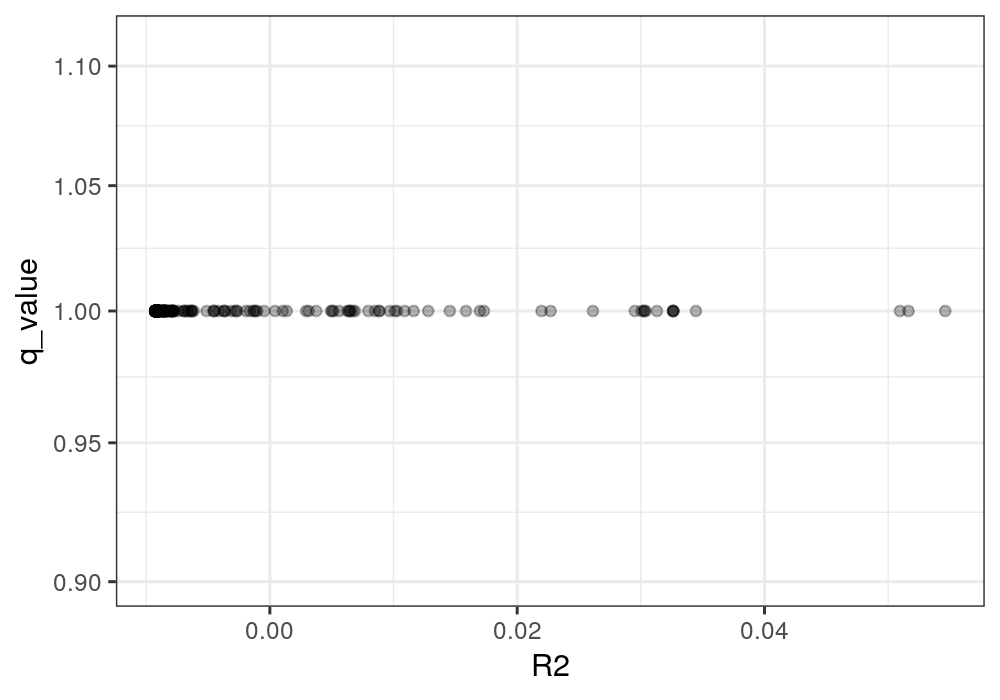

In [133]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, q_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw() 

p.dims(5,3.5)
plot(p)

## Diet

In [28]:
y = colnames(otu)[(length(diet_vars)+1):(ncol(otu)-1)]     # all OTUs
ret = plyr::llply(1:length(host_tree_l),
                  pgls_each_tree,
                  y = y,
                  x = 'diet',
                  tree_list = host_tree_l,
                  data = otu,
                  threads = threads)

ret = do.call(rbind, ret) %>%
    as.data.frame
ret 

,Estimate,std_err,t_value,p_value,R2,x,y,rep
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
diet,0,0,NaN,NaN,NaN,diet,c5fbed2bb10ab3a08275a92e9caea3c1,1
diet1,0,0,NaN,NaN,NaN,diet,X1936b1a270b058c5754be0addc7c7c31,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
diet35399,0.00000000,0.0000000,NaN,NaN,NaN,diet,X36fd5c55ad082f4d05194157da9d13da,100
diet35499,0.01123696,0.2829388,0.03971515,0.9683935,-0.00924452,diet,d7dd0bdd8184f8cb7189e1e09afa97d0,100


In [29]:
# formatting results
pgls_res = ret %>%
    group_by(rep) %>%
    mutate(p_value = p_value %>% as.Num,
           q_value = p.adjust(p_value, method='BH')) %>%
    group_by(y) %>%
    summarize(Estimate = mean(Estimate),
              std_err = mean(std_err),
              t_value = mean(t_value),
              p_value = mean(p_value),
              q_value = (length(q_value) - sum(q_value < 0.05)) / length(q_value),
              R2 = mean(R2),
              x = first(x))

pgls_res$p_value %>% summary
pgls_res$q_value %>% summary
pgls_res

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.3856  0.7132  0.6239  0.8970  0.9956     106 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   1.000   1.000   0.956   1.000   1.000     106 

y,Estimate,std_err,t_value,p_value,q_value,R2,x
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
a037a93b9d93156a9b42c06638063f81,-0.37395351,0.2686453,-1.36604114,0.2565072,1,0.01175779,diet
a3687ef99b6390eb2b6317868647a150,0.02222175,0.2692009,0.08242957,0.9344591,1,-0.00919538,diet
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X9ef214cb9244d2751cde5adc3c1e12f7,0.09686599,0.2389179,0.4054363,0.6859589,1,-0.007725477,diet
X9f56339e83804b62fd2e269181961eff,0.03093338,0.2740525,0.1176286,0.9065909,1,-0.009127884,diet


### Saving output

In [19]:
# output file name
pgls_res_file = file.path(work_dir, 'pgls_IndD_otu-rare250_diet.RDS')
pgls_res_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_otu-rare250_diet.RDS"

In [138]:
# saving
saveRDS(pgls_res, file=pgls_res_file)
cat('File written:', pgls_res_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//pgls_IndD_otu-rare250_diet.RDS 


In [20]:
# re-load 
pgls_res = readRDS(pgls_res_file) 
pgls_res %>% dfhead

[1] 355   8


y,Estimate,std_err,t_value,p_value,q_value,R2,x
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
a037a93b9d93156a9b42c06638063f81,-0.36359883,0.2484999,-1.42963886,0.2338031,1,0.013399562,diet
a3687ef99b6390eb2b6317868647a150,0.02274405,0.2703959,0.08399461,0.9332176,1,-0.009192939,diet
a3acff0b549467fd76310602b972ffad,-0.74887754,0.4745118,-1.57820642,0.1174428,1,0.013491950,diet


In [33]:
send_email('http://127.0.0.1:9805/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/03_modulating_factors/04b_PGLS_IndD_rare250.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



### Summary

In [21]:
# summary
pgls_res$p_value %>% summary_x('p-value')
pgls_res$q_value %>% summary_x('adj p-value')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
p-value,6.996615e-10,0.384168,0.7199496,0.6240406,0.8961857,0.9956088,106,39.838,15.057


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
adj p-value,0,1,1,0.9560241,1,1,106,39.754,15.026


Warning message:
“Removed 106 rows containing missing values (geom_point).”


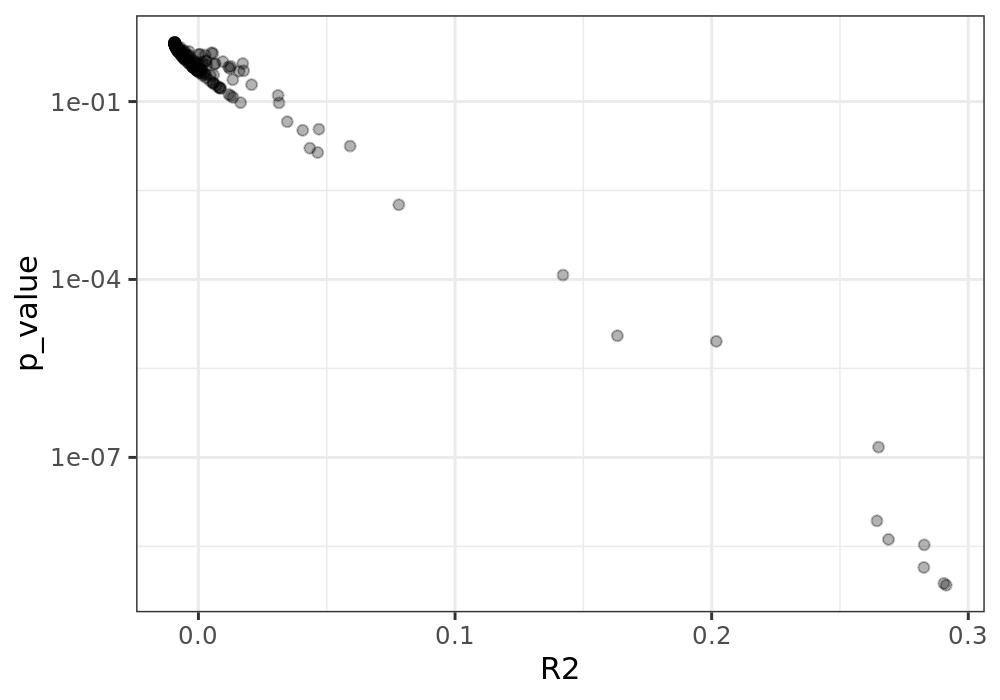

In [22]:
# p-value distribution
p = ggplot(pgls_res, aes(R2, p_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw()

p.dims(5,3.5)
plot(p)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 106 rows containing missing values (geom_point).”


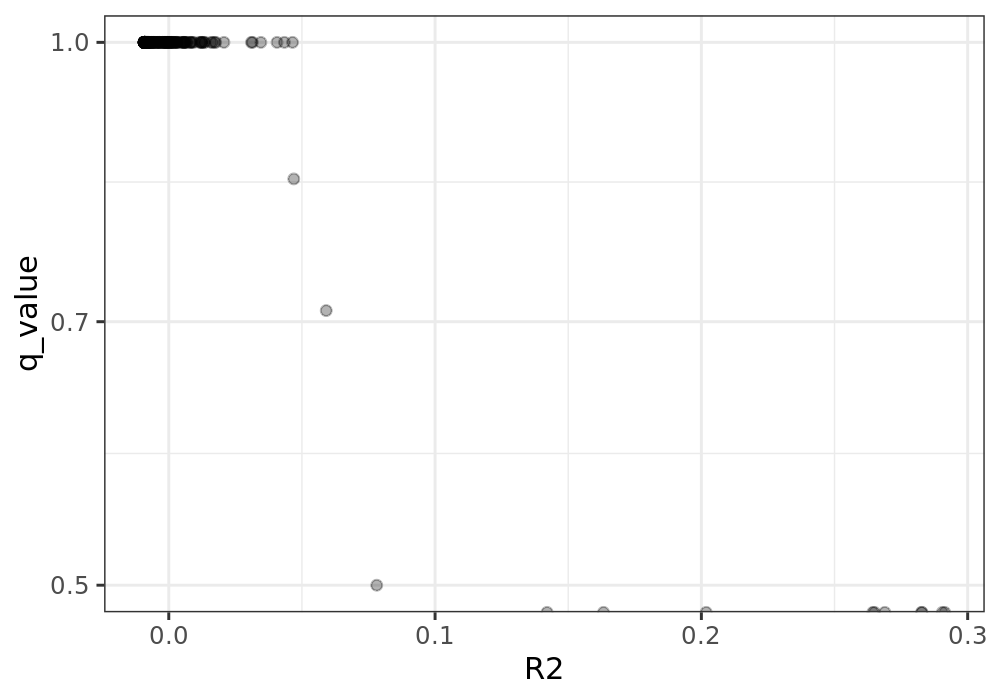

In [23]:
# p-adj-value distribution
p = ggplot(pgls_res, aes(R2, q_value)) +
    geom_point(alpha=0.3) +
    scale_y_log10() +
    theme_bw() 

p.dims(5,3.5)
plot(p)

### Significant OTUs

In [25]:
# filtering & adding taxonomy
pgls_res_j = pgls_res %>%
    filter(q_value < 0.05) %>%
    inner_join(physeq %>% 
                   phyloseq2df(tax_table) %>%
                   mutate(OTU = gsub('^([0-9])', 'X\\1', OTU)),
               c('y' = 'OTU'))
cat('Number of sig. OTUs:', pgls_res_j %>% nrow, '\n')
pgls_res_j 

Number of sig. OTUs: 10 


y,Estimate,std_err,t_value,p_value,q_value,R2,x,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
b7ed842d3fbe5d8d33504a0a765409ae,-11.385378,2.6231561,-4.354511,1.185938e-04,0,0.1420699,diet,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanothermobacteraceae,Methanothermobacter,unclassified
cbb2255f73a84a2c3aa7bfb7eff84c20,-2.663701,0.4239178,-6.348967,1.490016e-07,0,0.2650341,diet,Archaea,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X4cc04d93c23be54fff6f2d911e3ebe6a,13.8327796,2.15801615,6.410355,4.137442e-09,0,0.2689088,diet,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera sp. A4
X6f9c259ab8040babcc3afc4f024aa8aa,-0.2452755,0.03705818,-6.632973,3.352330e-09,0,0.2828395,diet,Archaea,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088


In [26]:
# viewing taxonomic distribution
df.dims(30)
pgls_res_j %>%
    dplyr::select(Estimate, p_value, q_value, R2,
                  Phylum, Class, Order, Family, Genus, Species) %>%
    arrange(-R2) 
df.dims()

Estimate,p_value,q_value,R2,Phylum,Class,Order,Family,Genus,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
-8.2814465,6.996615e-10,0,0.2913917,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088
-3.1705203,7.510606e-10,0,0.2904839,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088
-0.2452755,3.352330e-09,0,0.2828395,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088
-11.2596860,1.394872e-09,0,0.2826829,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter smithii TS146C
13.8327796,4.137442e-09,0,0.2689088,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera sp. A4
-2.6637012,1.490016e-07,0,0.2650341,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088
6.3117767,8.521475e-09,0,0.2643977,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera sp. A4
26.2996988,9.069403e-06,0,0.2018115,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter smithii TS146C
-10.9212936,1.124786e-05,0,0.1632645,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter smithii TS146C


#### Saving results

In [146]:
F = file.path(work_dir, 'PGLS_IndD_otu-rare250_sig-ASV_diet.RDS')
saveRDS(pgls_res_j, file=F)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/modulating/PGLS//PGLS_IndD_otu-rare250_sig-ASV_diet.RDS 


#### Plotting 

In [34]:
# formatting results
pgls_res = ret %>%
    group_by(rep) %>%
    mutate(p_value = p_value %>% as.Num,
           q_value = p.adjust(p_value, method='BH')) %>%
    group_by(y) %>%
    mutate(q_value = (length(q_value) - sum(q_value < 0.05)) / length(q_value)) %>%
    ungroup() %>%
    filter(q_value < 0.05)

pgls_res$p_value %>% summary
pgls_res$q_value %>% summary
pgls_res

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
6.000e-10 7.000e-10 3.200e-09 1.951e-05 1.409e-06 1.983e-03 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.002   0.000   0.020 

Estimate,std_err,t_value,p_value,R2,x,y,rep,q_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>
-2.8126556,0.53731696,-5.234630,8.203578e-07,0.1949859,diet,cbb2255f73a84a2c3aa7bfb7eff84c20,1,0
-0.2430957,0.03595612,-6.760898,7.272680e-10,0.2908712,diet,X6f9c259ab8040babcc3afc4f024aa8aa,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
13.872016,2.1501945,6.451517,3.217105e-09,0.2714979,diet,X4cc04d93c23be54fff6f2d911e3ebe6a,100,0
6.348211,0.9839873,6.451517,3.217105e-09,0.2714979,diet,X313291dd4edabceac770094aa143f943,100,0


In [35]:
# adding taxonomy
pgls_res = pgls_res %>%
    inner_join(physeq %>% 
                   phyloseq2df(tax_table) %>%
                   mutate(OTU = gsub('^([0-9])', 'X\\1', OTU)),
               c('y' = 'OTU'))
pgls_res

Estimate,std_err,t_value,p_value,R2,x,y,rep,q_value,Domain,Phylum,Class,Order,Family,Genus,Species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
-2.8126556,0.53731696,-5.234630,8.203578e-07,0.1949859,diet,cbb2255f73a84a2c3aa7bfb7eff84c20,1,0,Archaea,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088
-0.2430957,0.03595612,-6.760898,7.272680e-10,0.2908712,diet,X6f9c259ab8040babcc3afc4f024aa8aa,1,0,Archaea,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
13.872016,2.1501945,6.451517,3.217105e-09,0.2714979,diet,X4cc04d93c23be54fff6f2d911e3ebe6a,100,0,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera sp. A4
6.348211,0.9839873,6.451517,3.217105e-09,0.2714979,diet,X313291dd4edabceac770094aa143f943,100,0,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera sp. A4


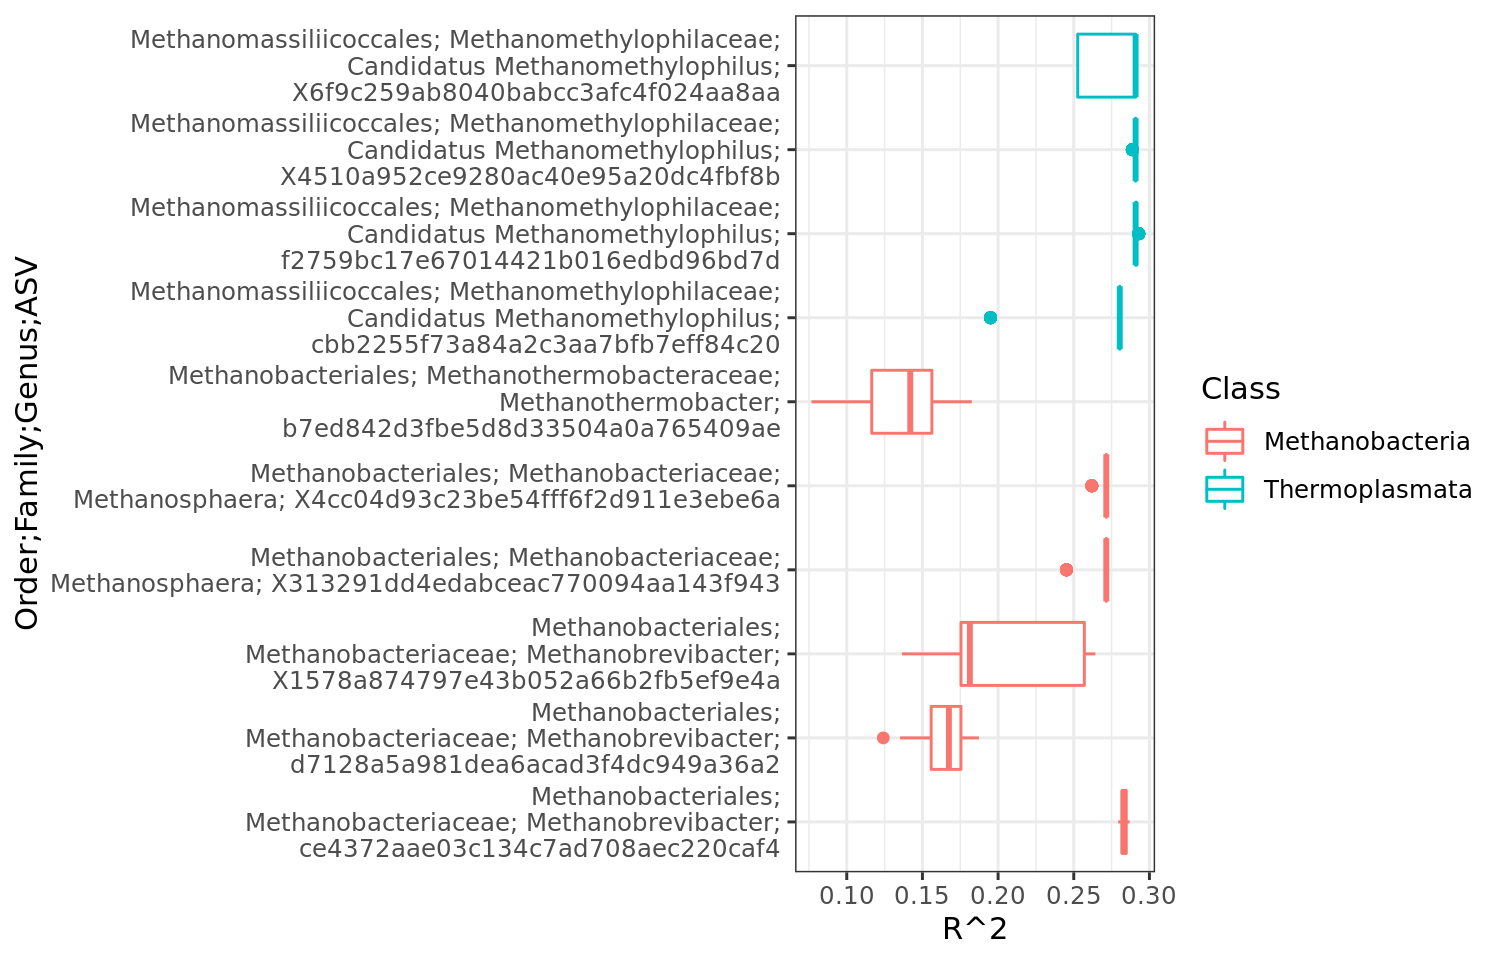

In [39]:
# plotting
p = pgls_res %>%
    #mutate(y = y %>% as.factor %>% as.numeric %>% gsub('^', 'ASV-', .)) %>%
    mutate(Taxonomy = paste(Order, Family, Genus, y, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 50)) %>%
    ggplot(aes(Taxonomy, R2, color=Class)) +
    geom_boxplot() +
    labs(x='Order;Family;Genus;ASV', y='R^2') +
    theme_bw() +
    coord_flip()

p.dims(7.5,4.8)
plot(p)

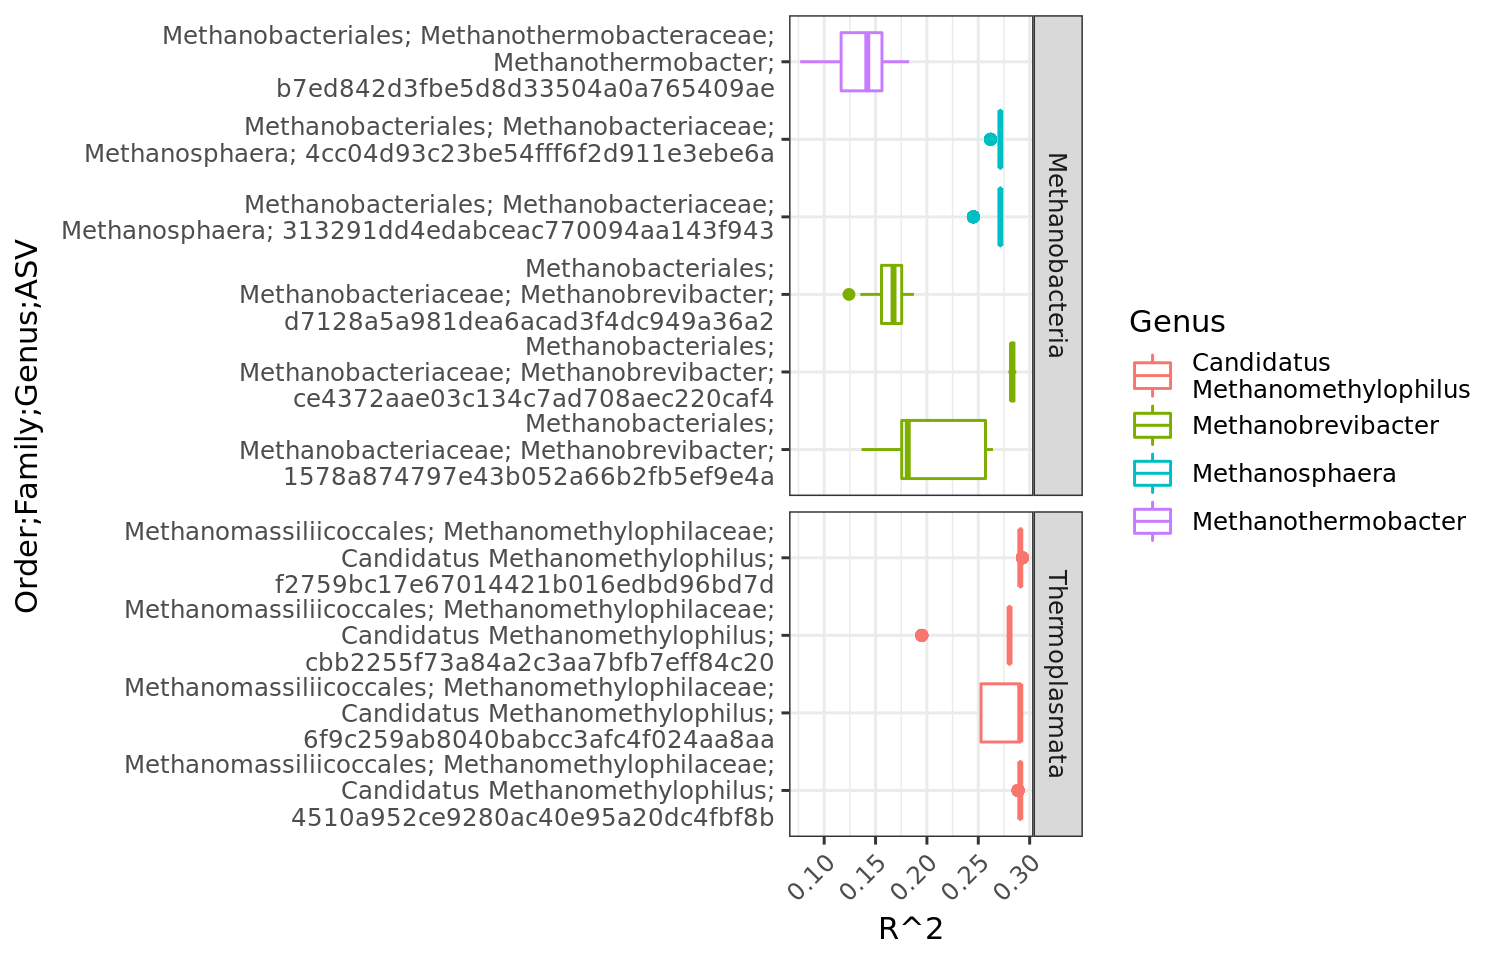

In [58]:
# plotting
p = pgls_res %>%
    mutate(y = gsub('^X([0-9])', '\\1', y),
           Taxonomy = paste(Order, Family, Genus, y, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 50),
           Genus = stringr::str_wrap(Genus, 20)) %>%
    ggplot(aes(Taxonomy, R2, color=Genus)) +
    geom_boxplot() +
    labs(x='Order;Family;Genus;ASV', y='R^2') +
    theme_bw() +
    facet_grid(Class ~ ., scales='free_y', space='free_y') +
    coord_flip() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(7.5,4.8)
plot(p)

### Sig. OTU dist. across diets

In [46]:
# significant taxa
otu = physeq %>%
    phyloseq2df(otu_table, long=TRUE) %>%
    mutate(OTU = gsub('^([0-9])', 'X\\1', OTU)) %>%
    inner_join(pgls_res_j, c('OTU'='y'))

otu %>% unique_n('OTUs', OTU)
otu

No. of unique OTUs: 10 


OTU,Sample,Count,Estimate,std_err,t_value,p_value,q_value,R2,x,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
cbb2255f73a84a2c3aa7bfb7eff84c20,F14_Common_Bream,0,-2.6637012,0.42391776,-6.348967,1.490016e-07,0,0.2650341,diet,Archaea,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088
X6f9c259ab8040babcc3afc4f024aa8aa,F14_Common_Bream,0,-0.2452755,0.03705818,-6.632973,3.352330e-09,0,0.2828395,diet,Archaea,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X4cc04d93c23be54fff6f2d911e3ebe6a,X67_European_Roe,0,13.832780,2.1580161,6.410355,4.137442e-09,0,0.2689088,diet,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera sp. A4
X313291dd4edabceac770094aa143f943,X67_European_Roe,0,6.311777,0.9963318,6.338791,8.521475e-09,0,0.2643977,diet,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,Methanosphaera sp. A4


In [47]:
# adding metadata
otu = otu %>%
    inner_join(metadata %>% 
                   dplyr::select(SampleID, class, order, family, genus, scientific_name,
                                 diet, digestive_system, habitat),
               c('Sample'='SampleID'))
otu    

OTU,Sample,Count,Estimate,std_err,t_value,p_value,q_value,R2,x,⋯,Genus,Species,class,order,family,genus,scientific_name,diet,digestive_system,habitat
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
cbb2255f73a84a2c3aa7bfb7eff84c20,F14_Common_Bream,0,-2.6637012,0.42391776,-6.348967,1.490016e-07,0,0.2650341,diet,⋯,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,omnivore,simple,aquatic habitat
X6f9c259ab8040babcc3afc4f024aa8aa,F14_Common_Bream,0,-0.2452755,0.03705818,-6.632973,3.352330e-09,0,0.2828395,diet,⋯,Candidatus Methanomethylophilus,Methanoculleus sp. CAG:1088,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,omnivore,simple,aquatic habitat
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X4cc04d93c23be54fff6f2d911e3ebe6a,X67_European_Roe,0,13.832780,2.1580161,6.410355,4.137442e-09,0,0.2689088,diet,⋯,Methanosphaera,Methanosphaera sp. A4,Mammalia,Artiodactyla,Cervidae,Capreolus,Capreolus_capreolus,herbivore,foregut,terrestrial habitat
X313291dd4edabceac770094aa143f943,X67_European_Roe,0,6.311777,0.9963318,6.338791,8.521475e-09,0,0.2643977,diet,⋯,Methanosphaera,Methanosphaera sp. A4,Mammalia,Artiodactyla,Cervidae,Capreolus,Capreolus_capreolus,herbivore,foregut,terrestrial habitat


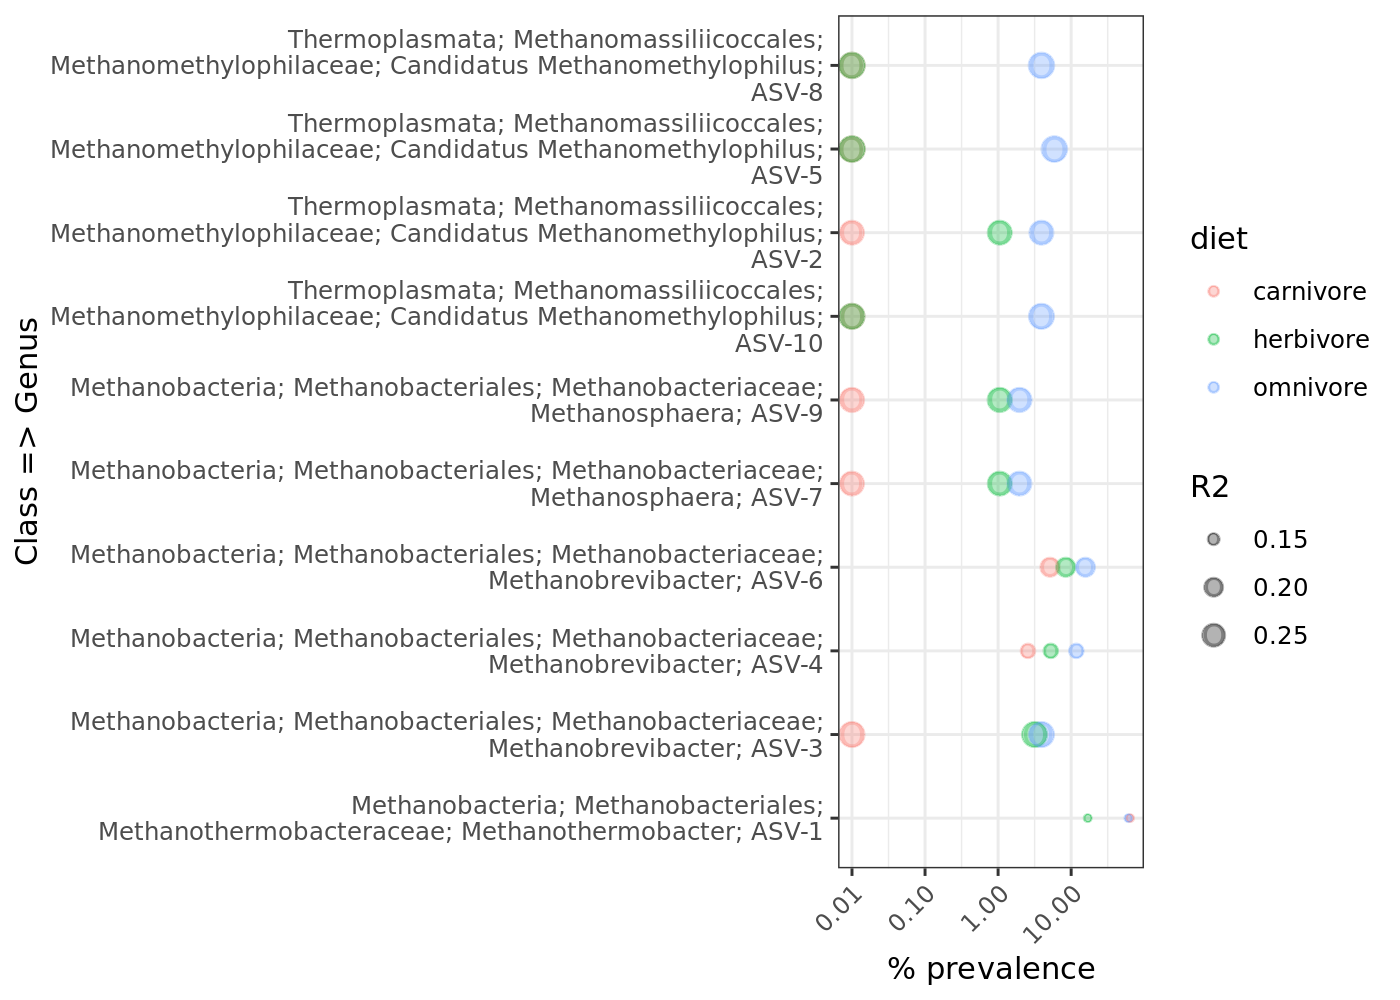

In [50]:
# plotting
p = otu %>%
    group_by(Class, Order, Family, Genus, Species, OTU, diet) %>%
    summarize(Count = sum(Count > 0) / length(Sample) * 100,
              R2 = mean(R2)) %>%
    ungroup() %>%
    mutate(Count = ifelse(Count == 0, 1e-2, Count)) %>%
    mutate(OTU = OTU %>% as.factor %>% as.numeric %>% gsub('^', 'ASV-', .)) %>%
    mutate(Taxonomy = paste(Class, Order, Family, Genus, OTU, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 60)) %>%
    ggplot(aes(Taxonomy, Count, color=diet, size=R2)) +
    geom_point(alpha=0.3) +
    geom_point(alpha=0.3, shape='O') +
    scale_y_log10() +
    scale_size_continuous(range=c(1,4)) +
    labs(x='Class => Genus', y='% prevalence') +
    theme_bw() +
    coord_flip() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(7,5)
plot(p)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1729 rows containing non-finite values (stat_boxplot).”


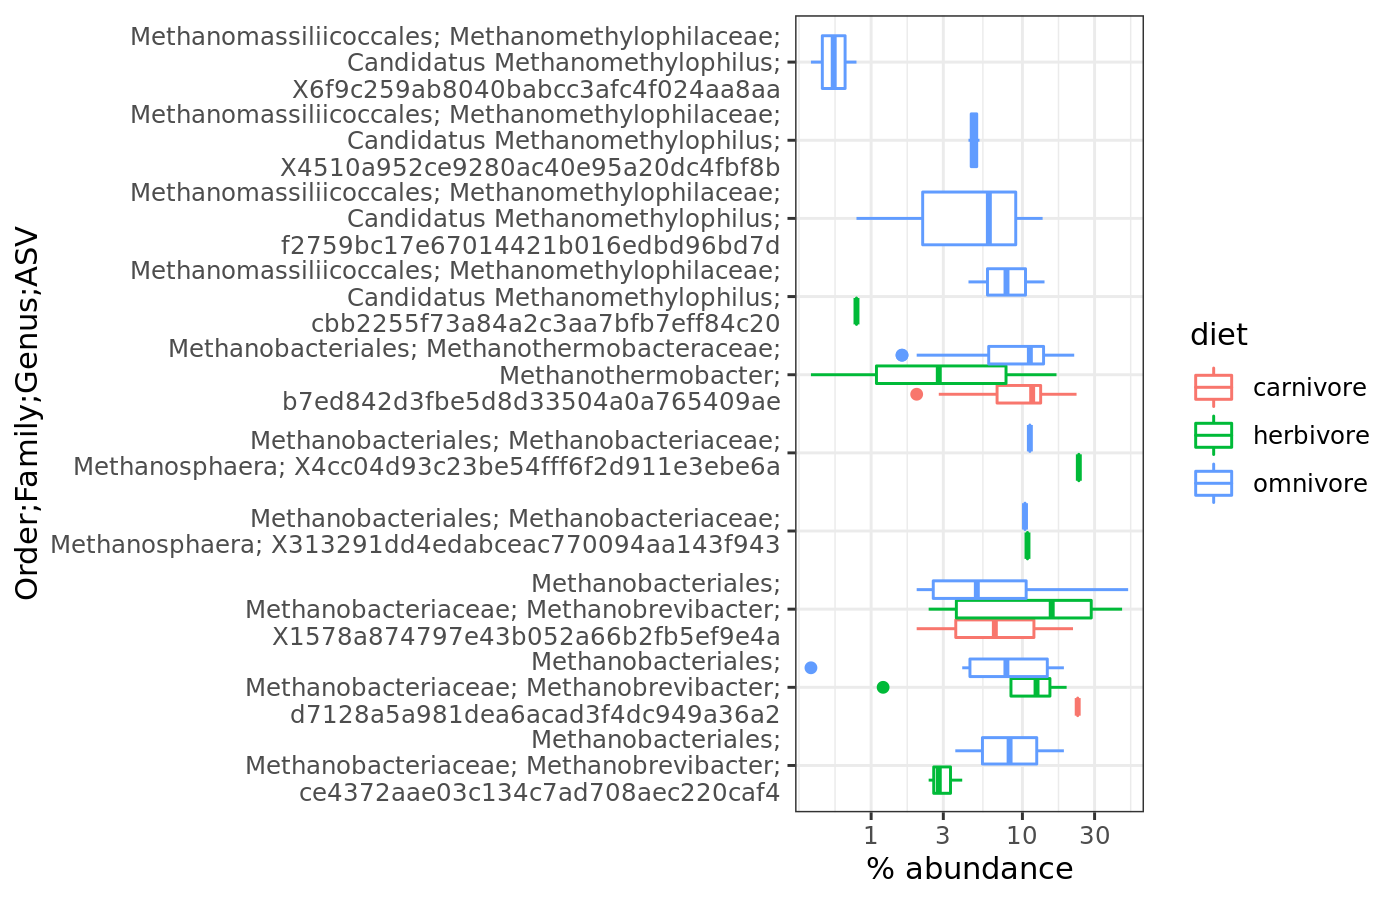

In [56]:
# plotting
p = otu %>%
    #mutate(OTU = OTU %>% as.factor %>% as.numeric %>% gsub('^', 'ASV-', .)) %>%
    #mutate(Count = ifelse(Count == 0, 1e-2, Count)) %>%
    mutate(Taxonomy = paste(Order, Family, Genus, OTU, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 50)) %>%
    ggplot(aes(Taxonomy, Count, color=diet)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x='Order;Family;Genus;ASV', y='% abundance') +
    theme_bw() +
    coord_flip()

p.dims(7,4.5)
plot(p)

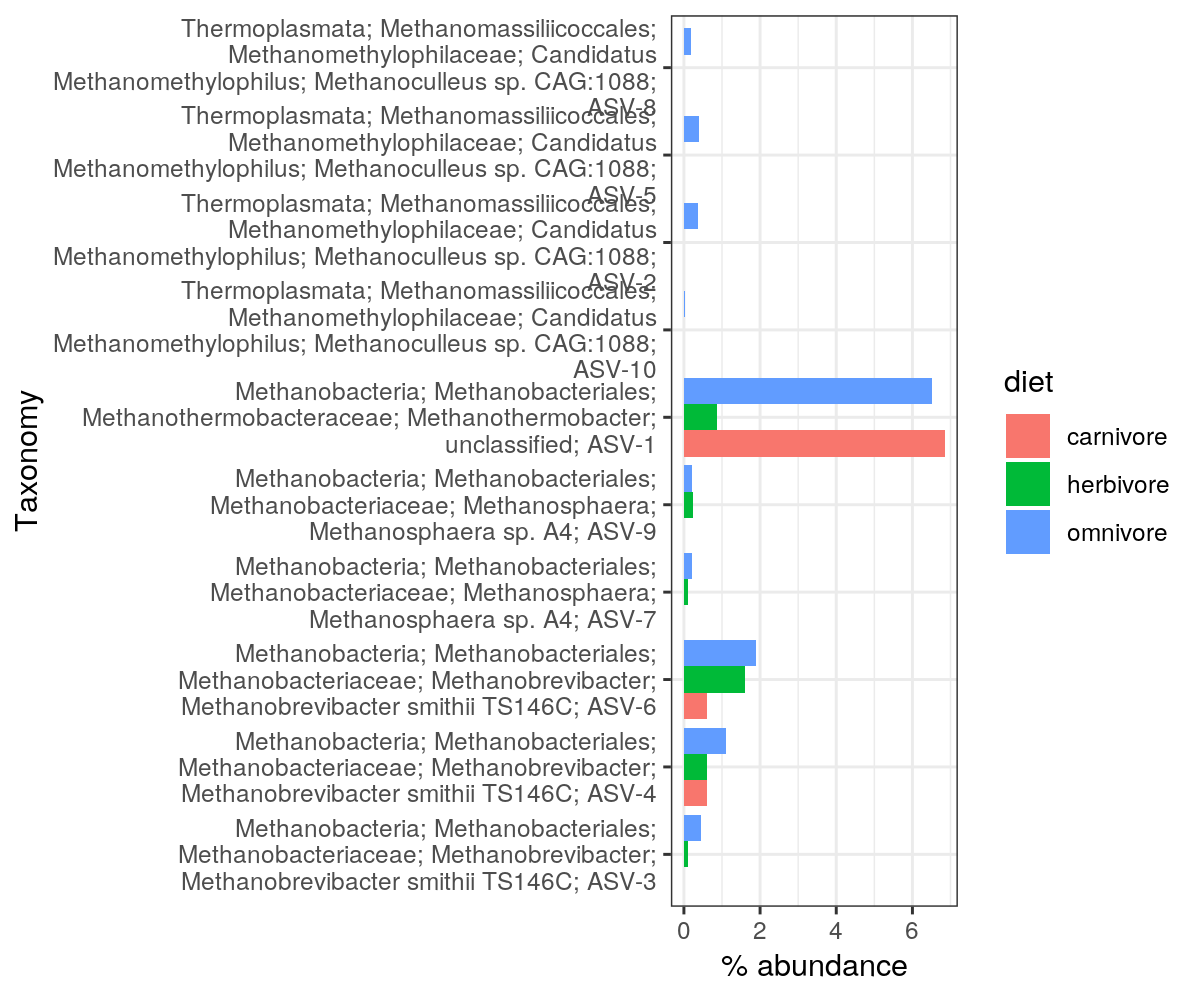

In [178]:
# plotting
p = otu %>%
    group_by(Class, Order, Family, Genus, Species, OTU, diet) %>%
    summarize(Count = mean(Count)) %>%
    ungroup() %>%
    mutate(OTU = OTU %>% as.factor %>% as.numeric %>% gsub('^', 'ASV-', .)) %>%
    mutate(Taxonomy = paste(Class, Order, Family, Genus, Species, OTU, sep='; '),
           Taxonomy = stringr::str_wrap(Taxonomy, 50)) %>%
    ggplot(aes(Taxonomy, Count, fill=diet)) +
    geom_bar(stat='identity', position='dodge') +
    labs(y='% abundance') +
    theme_bw() +
    coord_flip()

p.dims(6,5)
plot(p)

# sessionInfo

In [ ]:
sessionInfo()